# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&units=metric" + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    #print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        #print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saskylakh,71.9167,114.0833,-40.51,98,90,1.70,RU,1675176874
1,mapastepec,15.4333,-92.9000,28.88,45,0,0.47,MX,1675176874
2,rikitea,-23.1203,-134.9692,25.84,74,29,4.70,PF,1675176875
3,albany,42.6001,-73.9662,-1.54,66,79,1.34,US,1675176839
4,mahebourg,-20.4081,57.7000,28.16,83,75,3.09,MU,1675176875


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saskylakh,71.9167,114.0833,-40.51,98,90,1.70,RU,1675176874
1,mapastepec,15.4333,-92.9000,28.88,45,0,0.47,MX,1675176874
2,rikitea,-23.1203,-134.9692,25.84,74,29,4.70,PF,1675176875
3,albany,42.6001,-73.9662,-1.54,66,79,1.34,US,1675176839
4,mahebourg,-20.4081,57.7000,28.16,83,75,3.09,MU,1675176875


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

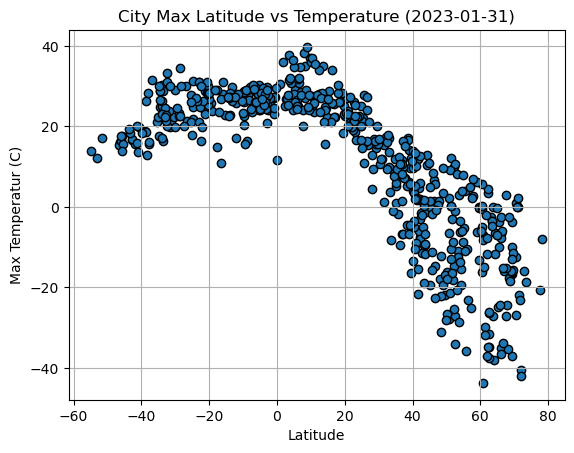

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs Temperature ({pd.to_datetime(city_date, unit='s').date()})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperatur (C)')
plt.grid(True)

# pd.to_datetime

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

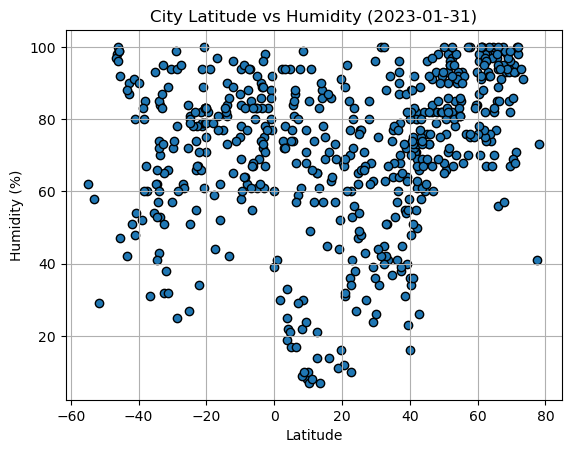

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity ({pd.to_datetime(city_date, unit='s').date()})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

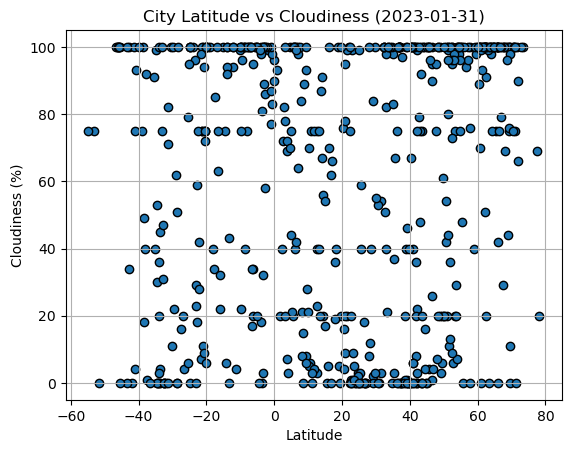

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({pd.to_datetime(city_date, unit='s').date()})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

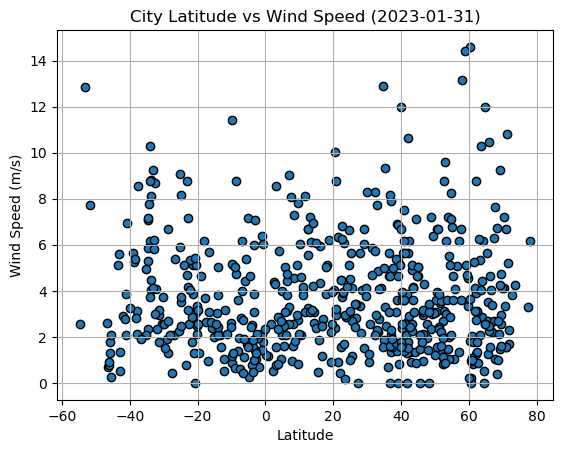

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed ({pd.to_datetime(city_date, unit='s').date()})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots

def linear_regression_plot(dataframe, x_col, y_col):
    
    x = dataframe[x_col]
    y = dataframe[y_col]
    
    
    # Perform linear regression
    slope, intercept, rvalue, pvalue, std_err = linregress(x, y)
    regress_values = x * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x, y)
    plt.xlabel("Latitude")
    plt.ylabel(y_col)
    plt.plot(x, regress_values, color='r')
    plt.annotate(line_eq, (x.mean(), y.mean()), textcoords="offset points", 
                 xytext=(-40,-70), ha='center', fontsize=14, color="red")

    print(f"The r-value is: {rvalue}")
    plt.show()

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saskylakh,71.9167,114.0833,-40.51,98,90,1.70,RU,1675176874
1,mapastepec,15.4333,-92.9000,28.88,45,0,0.47,MX,1675176874
3,albany,42.6001,-73.9662,-1.54,66,79,1.34,US,1675176839
5,yangambi,0.8102,24.4336,30.60,41,93,1.15,CD,1675176875
6,qaanaaq,77.4840,-69.3632,-20.77,41,69,3.31,GL,1675176348


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,rikitea,-23.1203,-134.9692,25.84,74,29,4.70,PF,1675176875
4,mahebourg,-20.4081,57.7000,28.16,83,75,3.09,MU,1675176875
8,punta arenas,-53.1500,-70.9167,12.06,58,75,12.86,CL,1675176169
9,alenquer,-1.9417,-54.7383,26.32,83,99,0.70,BR,1675176594
10,carnarvon,-24.8667,113.6333,24.74,81,0,8.15,AU,1675176355


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8435786967089466


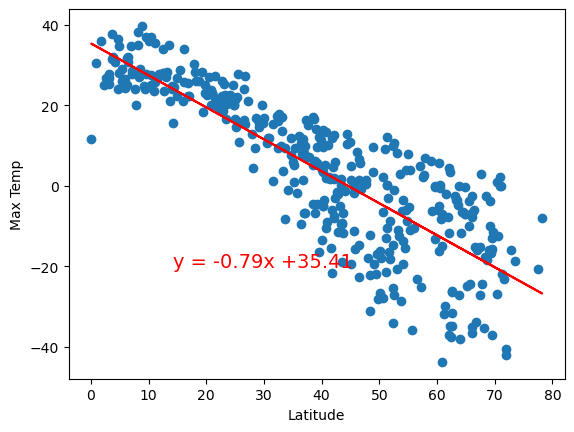

In [49]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Lat', 'Max Temp')

The r-value is: 0.5052827733755045


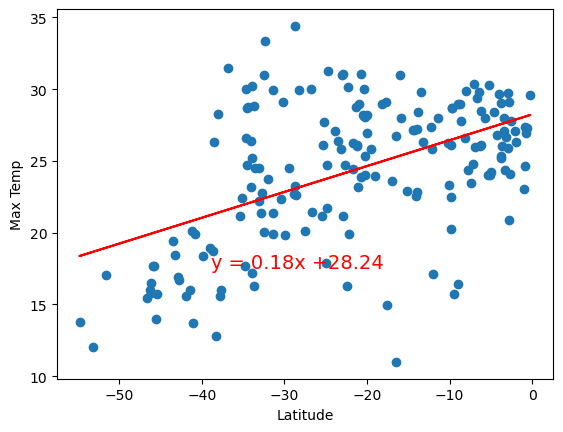

In [39]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Lat', 'Max Temp')

**Discussion about the linear relationship:** In the above scatter plots we can indicates a strong negative linear relationship between latitude and maximum temperature in the northern hemisphere and moderate positive linear relationship between latitude and maximum temperature in the southern hemisphere.

This means that as latitude increases in the northern hemisphere, maximum temperature decreases and as latitude increases in the southern hemisphere, maximum temperature mainly increses as well.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.523034989843005


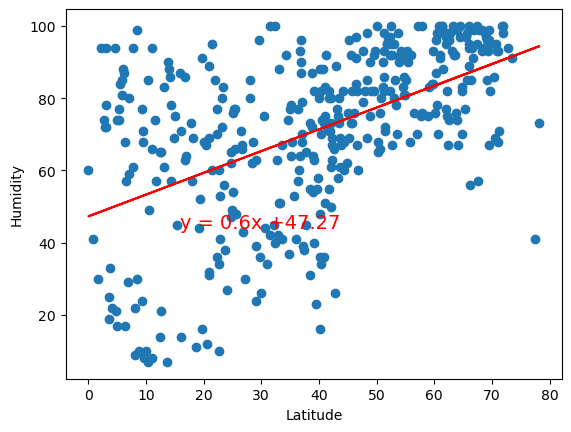

In [17]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Lat', 'Humidity')

The r-value is: 0.16837322331126114


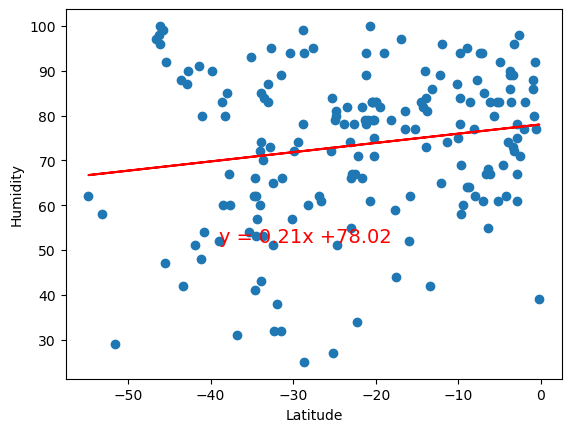

In [18]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Lat', 'Humidity')

**Discussion about the linear relationship:** In the above scatter plots we can indicates a moderate positive linear relationship between latitude and humidity in the northern hemisphere and slightly lower positive linier relationship in  the southern hemisphere.

This means that as latitude increases, humidity mainly increases in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2901273735223209


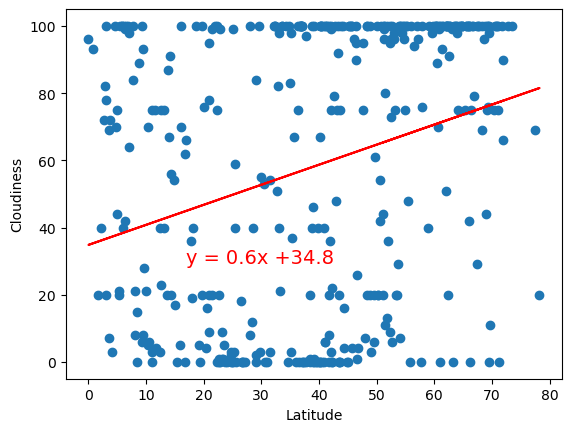

In [19]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Lat', 'Cloudiness')

The r-value is: 0.23980266200497952


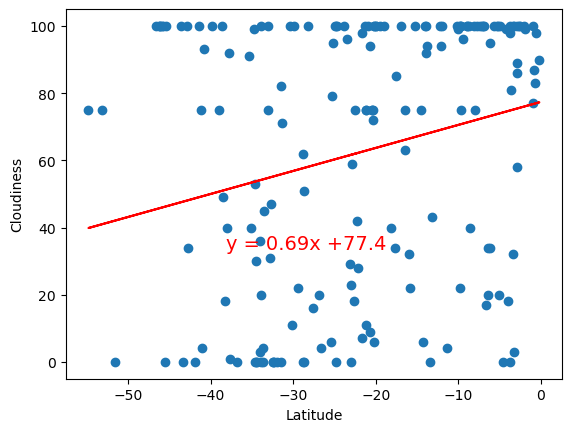

In [20]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Lat', 'Cloudiness')

**Discussion about the linear relationship:**  In the above scatter plots we do not observe any significant linear relationship between latitude and cloudiness in any hemisphere. However, we can see a minor increase in cloudiness in the southern hemisphere closer to the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02028070356704543


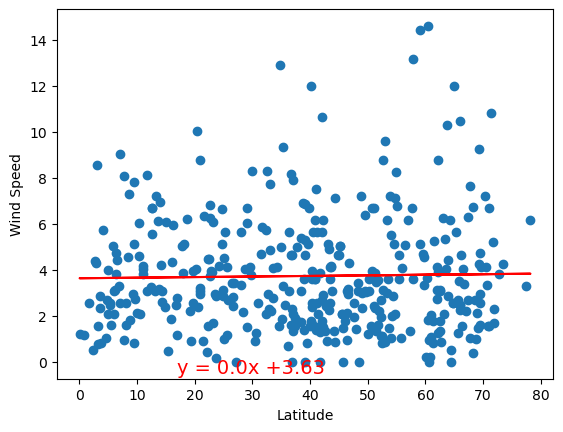

In [21]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Lat', 'Wind Speed')

The r-value is: -0.22193599736910416


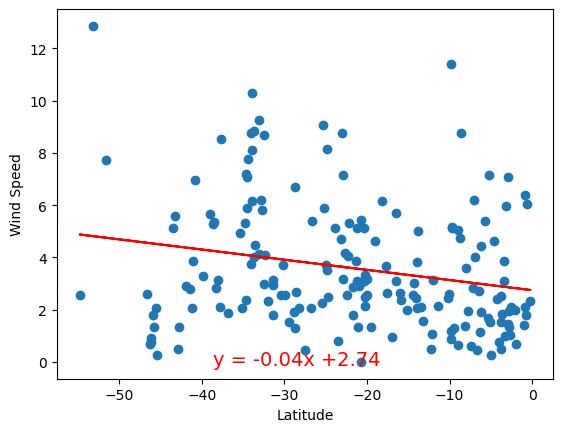

In [22]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Lat', 'Wind Speed')

**Discussion about the linear relationship:** In the above scatter plots the r-value for the northern hemisphere indicating a weak positive correlation between latitude and wind speed and for the southern hemisphere data, the r-value indicating a weak negative correlation between latitude and wind speed.

This means that as latitude increases in the northern hemisphere, wind speed slightly increases, while in the southern hemisphere, wind speed slightly decreases as latitude increases.